# Problem 3

## Section A

In [1]:
import numpy as np
from scipy.special import logsumexp
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
def parse_txt_file(filename, datapoints=[]):
    with open(filename) as f:
        line = f.readline()
        while line:
            vals = line.split(' ')
            datapoints.append([float(vals[0]), float(vals[1])])
            line = f.readline()
    return np.array(datapoints)

def plot_cluster(params):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(datapoints[:,0], datapoints[:,1])
    for param in params:
        ax.scatter(param['mu'][0], param['mu'][1], color='yellow')

def initialize_random_params(k, params=[]):
    for i in range(k):
        param = {
            'pi': np.random.uniform(0, 1),
            'mu': np.random.normal(0, 1, size=(2,)),
            'cov': np.array([[1., 0.], [0., 1.]])}
        params.append(param)
    return params    

def param_details(recoverd_params):
    for num, param in enumerate(recovered_params):
        print('param {}'.format(num + 1))
        print('pi:', param['pi'])
        print('mu:', param['mu'])
        print('covariance:', param['cov'])

def compute_weight(X, pi, mu, covariance) -> np.array:
    n = X.shape[1]
    base = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(covariance) ** 0.5)
    exponent = np.exp(-0.5 * np.dot(np.dot((X - mu), np.linalg.inv(covariance)), (X - mu).T))
    return np.diagonal(base * exponent).reshape(-1, 1)

def measure_likelihood(params):
    return np.sum(np.log(np.array([param['exp'] for param in params])))

In [3]:
def e_loop(datapoints, params) -> dict:
    exp = np.zeros((len(datapoints), 1), dtype=np.float64)    
    
    for param in params:
        n = datapoints.shape[1]
        pi = param['pi']
        mu = param['mu']
        covariance = param['cov']
        
        # calculate weight
        base = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(covariance) ** 0.5)
        exponent = np.exp(-0.5 * np.dot(np.dot((datapoints - mu), np.linalg.inv(covariance)), (datapoints - mu).T))
        gaussian = np.diagonal(base * exponent).reshape(-1, 1)
        param['weight'] = (pi * gaussian).astype(np.float64)

        # sum up all the weights
        for i in range(len(datapoints)):
            exp[i] += param['weight'][i]
        param['exp'] = exp

    # weight divided by sum of gaussian weight
    for param in params:
        param['weight'] /= param['exp']

    return param

In [4]:
def m_loop(datapoints, params) -> dict:
  
    for param in params:
        # new pi, mu value
        covariance = np.zeros((datapoints.shape[1], datapoints.shape[1]))
        pi = sum(param['weight']) / len(datapoints)
        mu = np.sum(param['weight'] * datapoints, axis=0) / sum(param['weight'])
        
        # new covariance value
        for i in range(len(datapoints)):
            difference = (datapoints[i] - mu).reshape(-1, 1)
            covariance += param['weight'][i] * np.dot(difference, difference.T)
        covariance /= sum(param['weight'])
        
        # assign new values to param
        param['pi'] = pi
        param['mu'] = mu
        param['cov'] = covariance
    return params

In [6]:
def run_em_loop(k, datapoints, max_iter):
    likelihoods = []
    old_likelihood = 0
    params = initialize_random_params(k)

    # run em loop
    for i in range(max_iter):
        print(i, end= ' ')
        e_loop(datapoints, params)
        m_loop(datapoints, params)

        # measure and store likelihood
        likelihood = measure_likelihood(params)
        likelihoods.append(likelihood)

        # check if converge
        if abs(likelihood - old_likelihood) <= 1 :
            break
        old_likelihood = likelihood
    print('')
    return params, likelihoods

In [6]:
datapoints = parse_txt_file('2gaussian.txt')
recovered_params, likelihoods = run_em_loop(2, datapoints, max_iter=50)
param_details(recovered_params)

param 1
pi: [0.33315835]
mu: [2.98453064 3.05332347]
covariance: [[0.9945547  0.02905994]
 [0.02905994 2.94532814]]
param 2
pi: [0.66684165]
mu: [7.00807651 3.98023509]
covariance: [[0.98371306 0.50255869]
 [0.50255869 1.00540914]]


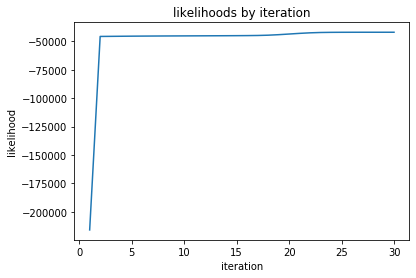

In [7]:
plt.title('likelihoods by iteration')
plt.xlabel('iteration')
plt.ylabel('likelihood')
plt.plot(range(1, len(likelihoods) + 1), likelihoods)

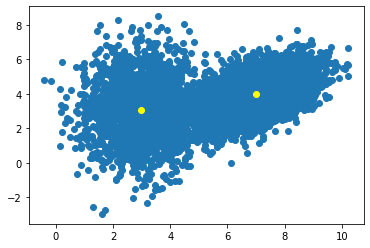

In [8]:
plot_cluster(recovered_params)

## Section B

In [7]:
datapoints = parse_txt_file('3gaussian.txt')
recovered_params, likelihoods = run_em_loop(3, datapoints, max_iter=100)
param_details(recovered_params)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 
param 1
pi: [0.20416702]
mu: [3.02874019 3.03937788]
covariance: [[1.01469207 0.0153763 ]
 [0.0153763  3.37696049]]
param 2
pi: [0.49622261]
mu: [5.00944821 7.00105835]
covariance: [[0.97838186 0.18790302]
 [0.18790302 0.97501436]]
param 3
pi: [0.29961037]
mu: [7.01551435 4.01519182]
covariance: [[0.99969784 0.50358871]
 [0.50358871 1.00041748]]


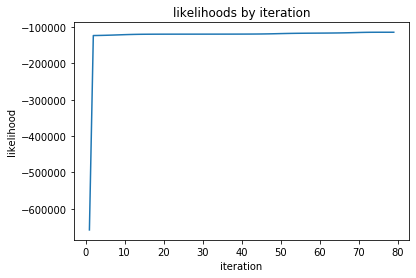

In [8]:
plt.title('likelihoods by iteration')
plt.xlabel('iteration')
plt.ylabel('likelihood')
plt.plot(range(1, len(likelihoods) + 1), likelihoods)

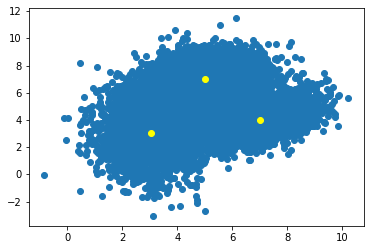

In [9]:
plot_cluster(recovered_params)